如果可以将连续的数值转换成对应的区间，这样就可以完成分类任务了，逻辑回归中借助sigmoid函数完成了数值映射，通过概率值比较来完成分类任务

In [3]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### sigmoid函数：

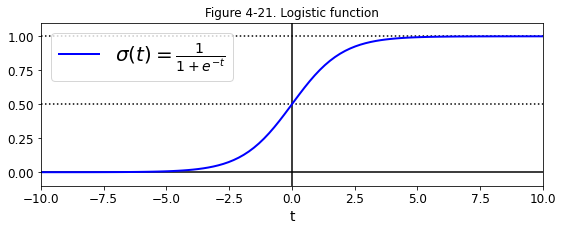

In [4]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Figure 4-21. Logistic function')
plt.show()

### 推导公式：
![title](./img/1.png)

### 鸢尾花数据集：
![title](./img/2.png)

### 加载sklearn内置数据集

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [13]:
print (iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


对于传统逻辑回归，要对标签多变换，也就是属于当前类别为1，其他类别为0

In [10]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

In [11]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X,y)

LogisticRegression()

In [17]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_res.predict_proba(X_new)

In [18]:
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [81]:
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

随着输入特征数值的变化，结果概率值也会随之变化

In [20]:
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.int)


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [21]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression(C = 10000)
log_res.fit(X,y)

LogisticRegression(C=10000)

In [26]:
X[:,0].min(),X[:,0].max()

(1.0, 6.9)

In [27]:
X[:,1].min(),X[:,1].max()

(0.1, 2.5)

### 决策边界的绘制：
- 构建坐标数据，合理的范围当中，根据实际训练时输入数据来决定
- 整合坐标点，得到所有测试输入数据坐标点
- 预测，得到所有点的概率值
- 绘制等高线，完成决策边界

构建坐标数据：

In [28]:
x0,x1 = np.meshgrid(np.linspace(1,2,2).reshape(-1,1),np.linspace(10,20,3).reshape(-1,1))

In [29]:
x0

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [30]:
x1

array([[10., 10.],
       [15., 15.],
       [20., 20.]])

In [31]:
np.c_[x0.ravel(),x1.ravel()]

array([[ 1., 10.],
       [ 2., 10.],
       [ 1., 15.],
       [ 2., 15.],
       [ 1., 20.],
       [ 2., 20.]])

In [32]:
x0,x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),np.linspace(0.8,2.7,200).reshape(-1,1))


In [33]:
X_new = np.c_[x0.ravel(),x1.ravel()]
X_new

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [34]:
X_new.shape

(100000, 2)

In [35]:
y_proba = log_res.predict_proba(X_new)

In [36]:
x0.shape

(200, 500)

In [37]:
x1.shape

(200, 500)

Text(6.5, 2.3, 'Vir')

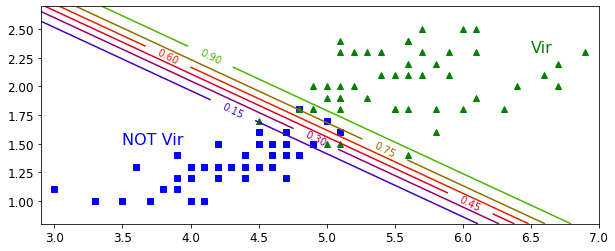

In [38]:
plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap=plt.cm.brg)
plt.clabel(contour,inline = 1)
plt.axis([2.9,7,0.8,2.7])
plt.text(3.5,1.5,'NOT Vir',fontsize = 16,color = 'b')
plt.text(6.5,2.3,'Vir',fontsize = 16,color = 'g')

### 进行多类别分类Softmax登场

![title](./img/3.png)

In [39]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [40]:
softmax_reg = LogisticRegression(multi_class = 'multinomial',solver='lbfgs')
softmax_reg.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [41]:
softmax_reg.predict([[5,2]])

array([2])

In [42]:
softmax_reg.predict_proba([[5,2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])

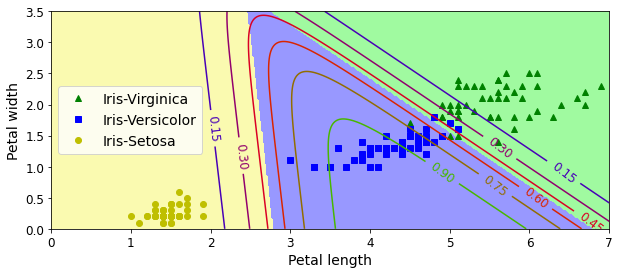

In [43]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()